In [260]:
import torch
import torchvision  #conatains utilities to work with image data 
#and also helps to download and import popular datasets
from torchvision.datasets import MNIST


In [261]:
#download the training dataset
dataset=MNIST(root='data/',download=True)
#it downloads th data to the data/ directory next to the notebook and creates Pytorch dataset


In [262]:
#The datset has 60,000 images which can be used to train the model

In [263]:
dataset


Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [264]:
len(dataset)  #length of training dataset

60000

In [265]:
#test dataset
test_dataset=MNIST(root='data/',train=False)


In [266]:
len(test_dataset)  #length of test dataset

10000

In [267]:

dataset[0]

# (a 28 by 28 pixel image which is an object of class PIL,label for the image)

(<PIL.Image.Image image mode=L size=28x28 at 0x18E156D2B80>, 5)

In [268]:

import matplotlib.pyplot as plt
%matplotlib inline  
#called IPython magic commands
#%matplotlib inline is added to indicate to jupyter that we want to plot the commands within the notebook
#without this jupyter will show image in a popup

#matplotlib imaging and graphing library in python

Label 5


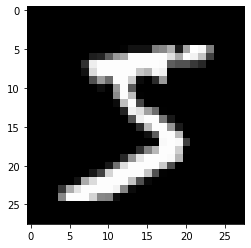

In [269]:
image,label=dataset[0]
plt.imshow(image,cmap="gray")
#cmap is telling imshow that the image is grayscale
# As it is a PIL image it can be displayed in the notebook using display(pil image)
print("Label",label)

Label 3


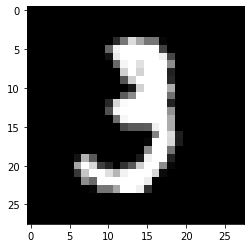

In [270]:
image,label=dataset[10]
plt.imshow(image,cmap='gray')
print("Label",label)


In [271]:
#pytorchdoesnt know how to work with images.We need to convert the images to tensors
#we can do this by specifying a transform while createing our dataset.

import torchvision.transforms as transforms

In [272]:
#torchvision.transforms contain many such predefined functions 
#we will use ToTensor transform to convert images into PyTorch tensors 

In [273]:



#MNIST dataset(images and labels)
dataset=MNIST(root='data/',train=True,transform=transforms.ToTensor())

#converts the training dataset containing images to tensors

In [274]:
img_tensor,label=dataset[0]
print(img_tensor.shape,label)

#The image is now converted to 1*28*28 tensor
#as the image was 28*28 pixels
#The first dimension is used to keep track of the color channels
#MNIST dataset are grayscale so there's just one channel.
#RGB dataset will have 3 channels 

torch.Size([1, 28, 28]) 5


In [275]:
print(img_tensor[:,10:15,10:15])
#here we are using array slicing
#everything from first dimension in this case there is only one
#5 rows  and  5 columns that are between 10 and 15 where 10 is inclusive 15 is exclusive
print(torch.max(img_tensor),torch.min(img_tensor))
#maximum and minimum values present in the tensor
#the numbers in the tensors are pixel values where 0 represents black and 1 represents white
#and the values in between are different shades of grey

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


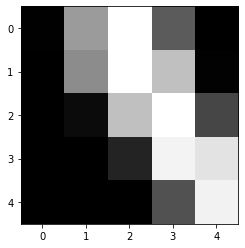

In [276]:
#plotting the image by passing in the selected rows and columns
plt.imshow(img_tensor[0,10:15,10:15],cmap="gray");

#in simple terms array is like tensor([for colour channel[for 28 by 28 pixels[array1],[array2],.........[array28]]])

In [277]:
from torch.utils.data import random_split
#used to split the training dataset into training and validation set

In [278]:
train_ds,val_ds=random_split(dataset,[50000,10000])
len(train_ds),len(val_ds)

#random_split(dataset,[amount of data in split1,amount of data in split2])
#random split is important to prevent overfitting of model 

(50000, 10000)

In [279]:
from torch.utils.data import DataLoader

batch_size=128

train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader=DataLoader(val_ds,batch_size)

#dataloader is used to make batches each of size 128 rows
#shuffle=True helps to randomize and generalize the training process

#the validation dataset is used for evaluating the model  so no need of shuffling

In [280]:

#pred=x @ w.t() + b 

#nn.Linear(number of inputs,number of outputs)
#Since nn.Linear excepts the each training example to be a vector each 1*28*28 image tensor
#needs to be flattened out into a vector of size 784 (28*28) before being passed into the model 

#The output for each image is the vector of size 10 with each element of the vector signifying the probability a particular label
#(0 to 9) . The predicted label for an image is simply the one with the highest probability.


In [281]:
import torch.nn as nn

input_size=28*28
num_classes=10   #return probabilities for each label and maximum will be the predicted label

#Logistic Regression model

model=nn.Linear(input_size,num_classes)

In [282]:
print(model.weight.shape)
model.weight                
#the weight tensor
#this means tensor([ [784 elements], [784 elements],.......such 10 arrays])
#all automatically generated (randomly)

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0265, -0.0225,  0.0041,  ...,  0.0127, -0.0042,  0.0020],
        [-0.0330, -0.0002, -0.0011,  ..., -0.0235,  0.0094,  0.0216],
        [ 0.0196, -0.0176,  0.0079,  ...,  0.0225, -0.0216,  0.0251],
        ...,
        [-0.0338,  0.0243, -0.0241,  ...,  0.0342, -0.0153, -0.0219],
        [ 0.0115, -0.0046,  0.0354,  ...,  0.0245, -0.0218,  0.0172],
        [ 0.0232, -0.0312, -0.0338,  ...,  0.0329, -0.0025, -0.0307]],
       requires_grad=True)

In [283]:
print(model.bias.shape)
model.bias
#10 bias values
#all automatically generated (randomly)

torch.Size([10])


Parameter containing:
tensor([ 0.0269,  0.0027,  0.0197, -0.0264,  0.0078,  0.0238,  0.0052, -0.0197,
        -0.0214,  0.0172], requires_grad=True)

In [284]:
for images,labels in train_loader:
    print(labels)
    print(images.shape)  #[batch size,1,28,28] will represent in this format
    output=model(images)
    break
    
#this leads to error because pur input data does not have the right shape
#Our images are of the shape 1*28*28 but we need them to be vectors of size 784 that is
#flatten them out.

#the models expects a vector of size 784 and we gave a 3 dimentional tensor so this created the error

tensor([5, 9, 7, 5, 0, 1, 6, 6, 1, 0, 3, 0, 0, 4, 0, 0, 3, 1, 0, 8, 1, 5, 0, 4,
        6, 3, 7, 4, 1, 1, 2, 7, 1, 5, 2, 6, 4, 3, 2, 3, 8, 5, 0, 1, 3, 0, 2, 5,
        3, 4, 2, 8, 6, 4, 1, 7, 2, 6, 1, 2, 3, 5, 1, 5, 8, 2, 7, 4, 2, 6, 8, 0,
        3, 5, 3, 4, 7, 2, 7, 8, 6, 2, 2, 4, 7, 0, 5, 4, 9, 4, 2, 5, 5, 1, 9, 1,
        9, 6, 2, 0, 4, 7, 1, 2, 4, 2, 0, 7, 5, 0, 5, 6, 8, 5, 6, 3, 1, 7, 9, 6,
        6, 0, 7, 9, 3, 2, 7, 5])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [285]:
#.reshape method of a tensor will allow us to efficiently view each 
#image as a flat vector 

#to include this additional functionality within our model we need to define a custom model by
#extending the nn.Module class from PyTorch

In [286]:
class MnistModel(nn.Module):  #this class extends nn.Module
    def __init__(self):       #the constructor
        super().__init__()     #using super method to call constructor of nn.Module
        self.linear=nn.Linear(input_size,num_classes)
        #inside the constructor we instantiate the weights and biases
        
    def forward(self,xb):       #this method gets executed when we pass some input to the model
        xb=xb.reshape(-1,784)
        out=self.linear(xb)     #this invokes the above nn.Linear  
        #this is similar to model(inputs) and it will return the output that is the prediction
        return out
    
        #reshape(128,784) that is batch size is 128 and each element in batch is a vetor of size 784
        #using reshape(-1,784) telling pytorch to figure out what the batch size is dynamically
        #so that it works for any batch size
        
model=MnistModel()  #creating an object of the class 
        

In [287]:
#model has no longer .weight and .bias attriutes
#as they are inside the .linear attribute
#but it does have a .parameters method which returns the weights and bias


In [288]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())  #contains weights and biases

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0209, -0.0327,  0.0034,  ..., -0.0038,  0.0045, -0.0324],
         [ 0.0218, -0.0044,  0.0076,  ...,  0.0030,  0.0063,  0.0180],
         [-0.0085,  0.0212, -0.0181,  ...,  0.0018, -0.0346, -0.0279],
         ...,
         [-0.0344,  0.0065, -0.0068,  ...,  0.0233, -0.0008, -0.0068],
         [-0.0176,  0.0250,  0.0117,  ...,  0.0010, -0.0044, -0.0352],
         [-0.0136, -0.0250,  0.0062,  ..., -0.0197,  0.0119,  0.0061]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0216, -0.0198,  0.0074,  0.0303,  0.0159,  0.0201, -0.0311, -0.0183,
          0.0256,  0.0017], requires_grad=True)]

In [289]:
for images,labels in train_loader:
    print("images.shape:",images.shape)
    outputs=model(images)
    break
    
print("output.shape:",outputs.shape)
print("Sample outputs:\n",outputs[:2].data) #showing 2 outputs of first batch 

images.shape: torch.Size([128, 1, 28, 28])
output.shape: torch.Size([128, 10])
Sample outputs:
 tensor([[-0.2006,  0.3234,  0.0023, -0.0086, -0.3566,  0.1881,  0.3750,  0.0525,
         -0.0327,  0.0806],
        [ 0.2168,  0.0146, -0.0093, -0.2380, -0.3442,  0.4468, -0.0377, -0.0420,
          0.2362,  0.1194]])


In [290]:
#as the outputs are negative we need to use softmax to convaert them to probabilities
exps=torch.exp(outputs[0]) 
exps


#each output is replaced by e to the power output

#now the numbers are not between 0 to 1 and also all probabilities should add up to one


tensor([0.8182, 1.3819, 1.0023, 0.9914, 0.7001, 1.2070, 1.4549, 1.0539, 0.9679,
        1.0839], grad_fn=<ExpBackward>)

In [291]:
probs=exps/torch.sum(exps)   #then we calculate probabilities by dividing each outcome by the sum of all the outcomes 
probs

#softmax formula
#  e raise to outcome/ summation(e raise to outcomes)
#this will generate the probabilities

tensor([0.0767, 0.1296, 0.0940, 0.0930, 0.0657, 0.1132, 0.1365, 0.0989, 0.0908,
        0.1017], grad_fn=<DivBackward0>)

In [292]:
import torch.nn.functional as F

In [293]:
#now we use inbuilt function for softmax
#apply softmax for each ouput row
#we tell to apply softmax across  dimension one as the output shape is (128,10)
#and the 0th dimension is the batch size so we  want to apply softmax across 1th dimention
probs=F.softmax(outputs,dim=1)

#look  at sample probabilities
print("Sample probabilities\n",probs[:2].data)


#Add up the probabilities of an output row
print("Sum:",torch.sum(probs[0]).item())


Sample probabilities
 tensor([[0.0767, 0.1296, 0.0940, 0.0930, 0.0657, 0.1132, 0.1365, 0.0989, 0.0908,
         0.1017],
        [0.1169, 0.0955, 0.0933, 0.0742, 0.0667, 0.1472, 0.0907, 0.0903, 0.1192,
         0.1061]])
Sum: 1.0


In [294]:
max_probs,preds=torch.max(probs,dim=1) 
#torch.max returns the largest element and the index of the largest element along a particular dimension
#dim=1 as dimension 0 has batch size
print(preds)
print(max_probs)

tensor([6, 5, 8, 3, 5, 8, 8, 8, 1, 2, 9, 0, 6, 8, 1, 8, 8, 5, 5, 2, 1, 8, 2, 5,
        5, 5, 0, 5, 8, 7, 5, 5, 0, 8, 1, 1, 5, 8, 5, 8, 1, 8, 6, 8, 8, 0, 1, 6,
        8, 5, 8, 9, 5, 8, 5, 1, 5, 6, 8, 8, 2, 1, 8, 2, 5, 8, 5, 6, 8, 5, 5, 5,
        0, 5, 8, 8, 5, 8, 6, 6, 1, 2, 8, 3, 5, 5, 5, 8, 1, 5, 5, 8, 8, 8, 1, 8,
        1, 5, 8, 8, 8, 8, 5, 2, 1, 1, 1, 1, 8, 6, 9, 2, 5, 8, 5, 0, 8, 1, 8, 8,
        1, 5, 8, 8, 6, 1, 8, 8])
tensor([0.1365, 0.1472, 0.1277, 0.1253, 0.1563, 0.1325, 0.1342, 0.1430, 0.1308,
        0.1243, 0.1165, 0.1312, 0.1306, 0.1513, 0.1447, 0.1223, 0.1359, 0.1179,
        0.1345, 0.1180, 0.1394, 0.1261, 0.1344, 0.1304, 0.1329, 0.1514, 0.1177,
        0.1392, 0.1256, 0.1158, 0.1297, 0.1213, 0.1206, 0.1470, 0.1295, 0.1303,
        0.1260, 0.1373, 0.1311, 0.1484, 0.1156, 0.1352, 0.1372, 0.1745, 0.1217,
        0.1155, 0.1238, 0.1218, 0.1201, 0.1358, 0.1324, 0.1206, 0.1265, 0.1334,
        0.1273, 0.1256, 0.1404, 0.1216, 0.1255, 0.1404, 0.1250, 0.1323, 0.1604,
       

In [295]:
labels
#as we started with random  values of weights and biases prediction is very bad

tensor([5, 1, 7, 2, 6, 4, 0, 8, 2, 2, 2, 7, 3, 7, 6, 9, 8, 9, 1, 2, 0, 4, 6, 2,
        1, 6, 9, 2, 3, 9, 1, 1, 1, 3, 6, 3, 3, 8, 2, 0, 6, 9, 3, 5, 6, 7, 3, 0,
        4, 6, 8, 4, 9, 5, 5, 1, 5, 6, 1, 5, 5, 0, 5, 9, 1, 8, 5, 6, 5, 9, 3, 7,
        8, 6, 5, 5, 9, 0, 6, 3, 0, 7, 5, 4, 4, 5, 9, 7, 0, 1, 0, 9, 3, 7, 0, 5,
        6, 2, 3, 4, 4, 8, 6, 0, 0, 5, 8, 0, 7, 8, 2, 0, 5, 9, 1, 1, 5, 6, 0, 9,
        5, 4, 5, 4, 3, 5, 9, 7])

In [296]:
#to do element wise comparision between the prediction and labels
#if element matches it stores a 1 else a zero and we sum this and divide by total number of elements in prediction

def accuracy(outputs,labels):
    _,preds=torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [297]:
accuracy(outputs,labels)

tensor(0.1328)

In [298]:
#the accuracy cannot be used as a loss function for optimizing our model using
#gradient descent

#1.its not a differentiable function torch.max and == are both non-continuous and non-differentiable
#It doesn't take into account the actual probabilities predicted by the model so it can't
#provide sufficient feedback for incremental improvements

#like accuracy function cannot check that if probabilities of correct label increased but still the probability is
#not the highest although the accuracy here as increased .These changes wont effect the accuracy value

In [299]:
#cross Entropy

#steps in cross entropy
#for each output row pick the predicted probability for the correct label and ignore the rest

#take the logarithm of the picked probability
#if the probability is high  that is close to 1 then its logarithm is a very small negative value close to 0
#and if the probability is low close to zero then the logarithm is a very large negative value
#we multiply the result by -1 which results in a large positive value of the loss for poor predictions

#finally take average of the cross entropy across all the ouput rows to get the overall loss for a batch

#Mathematically

#take ln of prediction 
#then create a matrix that has 1 at the highest probability index and 0 at the rest indexes
#take the dot product of these 2 matrices
#and then take the summation od all these cross entropy values for each row of output
#and finally multiply with -1

#this function is differentiable as we have created a vector which has all zeros and only 1 at the highest probability
#and this allows us to multiply the two vectors

#therefore cross entropy can be used as a loss funnction


In [300]:
loss_fn=F.cross_entropy

In [301]:
#Loss for current batch of data (cross_entropy automatically does the softmax function as well)
loss=loss_fn(outputs,labels)
print(loss)

#the .item() method extracts the value as a python float

tensor(2.3003, grad_fn=<NllLossBackward>)


In [302]:
class MnistModel(nn.Module):  #this class extends nn.Module
    def __init__(self):       #the constructor
        super().__init__()     #using super method to call constructor of nn.Module
        self.linear=nn.Linear(input_size,num_classes)
        #inside the constructor we instantiate the weights and biases
        
    def forward(self,xb):       #this method gets executed when we pass some input to the model
        xb=xb.reshape(-1,784)
        out=self.linear(xb)     #this invokes the above nn.Linear  
        #this is similar to model(inputs) and it will return the output that is the prediction
        return out
    
    def training_step(self,batch):
        images,labels=batch
        out=self(images)    #generate predictions        
        #inside the model self is the model itself
        #so we pass the images to the MnistModel
        #and caluculate the loss
        loss=F.cross_entropy(out,labels)
        return loss
    
    def validation_step(self,batch):
        images,labels=batch
        out=self(images)               #generate predictions
        loss=F.cross_entropy(out,labels)   #calculate loss
        acc=accuracy(out,labels)             #calculate accuracy
        #this function is defined earlier 
        return {"val_loss": loss,"val_acc": acc}
    
    def validation_epoch_end(self,outputs):
        batch_losses=[x["val_loss"] for x in outputs]
        epoch_loss=torch.stack(batch_losses).mean()  #combine losses
        #.stack() concates the tensor along a dimension 
        batch_accs=[x["val_acc"] for x in outputs]
        epoch_acc=torch.stack(batch_accs).mean()  #combine accuracies
        
        return {"val_loss": epoch_loss.item(),"val_acc": epoch_acc.item()}
    
    
    
        
    def epoch_end(self,epoch,result):
        print("Epoch [{}], val_loss: {:.4f},val_acc: {:.4f}".format(epoch,result["val_loss"],result["val_acc"]))
        

        
        
model=MnistModel()
        
    
        
        
    
    
    

In [303]:
def evaluate(model,val_loader):
    outputs=[model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)





In [304]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3198418617248535, 'val_acc': 0.11609968543052673}

In [305]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [308]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history=[]
    optimizer=opt_func(model.parameters(),lr)
    for epoch in range(epochs):
        #training phase
        for batch in train_loader:
            loss=model.training_step(batch)
            loss.backward()
            optimizer.step()  #this performs the gradient desecent
            optimizer.zero_grad()
        #validation phase
        result=evaluate(model,val_loader)
        model.epoch_end(epoch,result)
        history.append(result)
    return history
        

In [307]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3397204875946045, 'val_acc': 0.08306962251663208}

In [309]:
history1=fit(5,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 1.9700, val_acc: 0.5956
Epoch [1], val_loss: 1.6956, val_acc: 0.7276
Epoch [2], val_loss: 1.4900, val_acc: 0.7697
Epoch [3], val_loss: 1.3346, val_acc: 0.7907
Epoch [4], val_loss: 1.2151, val_acc: 0.8038


In [313]:
#define test dataset
test_dataset=MNIST(root='data/',train=False,transform=transforms.ToTensor())


Shape: torch.Size([1, 28, 28])
Label: 7


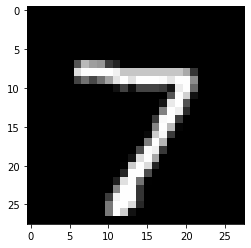

In [319]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Shape:',img.shape)
print("Label:",label)




In [320]:
def predict_image(img,model):
    xb=img.unsqueeze(0) #as aour model accepts batches unsqueeze adds an additional dimension for batch that is [1,1,28,28]
    yb=model(xb)
    _,preds=torch.max(yb,dim=1)
    return preds[0].item()

Label: 2 Predicted: 8


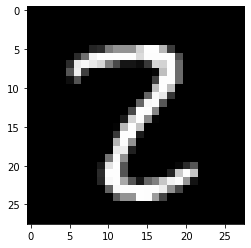

In [324]:
img,label=test_dataset[1839]
plt.imshow(img[0],cmap="gray")
print("Label:",label,"Predicted:",predict_image(img,model))

Label: 4 Predicted: 4


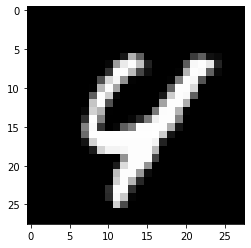

In [325]:
img,label=test_dataset[139]
plt.imshow(img[0],cmap="gray")
print("Label:",label,"Predicted:",predict_image(img,model))

In [326]:
test_loader=DataLoader(test_dataset,batch_size=256)
result=evaluate(model,test_loader)
result

{'val_loss': 1.1929028034210205, 'val_acc': 0.80810546875}

In [327]:
torch.save(model.state_dict(),"mnist-logistic.pth") #to save the model

In [328]:
model.state_dict()  #contains the weights and biases to avoid training again and again

OrderedDict([('linear.weight',
              tensor([[ 0.0254, -0.0036, -0.0161,  ..., -0.0288,  0.0328,  0.0219],
                      [ 0.0073,  0.0261,  0.0116,  ...,  0.0006, -0.0071, -0.0029],
                      [-0.0347, -0.0007, -0.0063,  ..., -0.0233,  0.0260, -0.0123],
                      ...,
                      [-0.0177,  0.0237,  0.0108,  ...,  0.0163,  0.0071,  0.0269],
                      [-0.0310,  0.0175,  0.0283,  ...,  0.0174,  0.0078,  0.0331],
                      [ 0.0126, -0.0225, -0.0345,  ...,  0.0056,  0.0282, -0.0055]])),
             ('linear.bias',
              tensor([-0.0012,  0.0236, -0.0163,  0.0196,  0.0263,  0.0423, -0.0276,  0.0434,
                      -0.0119, -0.0238]))])

In [330]:
model2=MnistModel()
model2.load_state_dict(torch.load("mnist-logistic.pth"))  #to load the stored weights and biases
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0254, -0.0036, -0.0161,  ..., -0.0288,  0.0328,  0.0219],
                      [ 0.0073,  0.0261,  0.0116,  ...,  0.0006, -0.0071, -0.0029],
                      [-0.0347, -0.0007, -0.0063,  ..., -0.0233,  0.0260, -0.0123],
                      ...,
                      [-0.0177,  0.0237,  0.0108,  ...,  0.0163,  0.0071,  0.0269],
                      [-0.0310,  0.0175,  0.0283,  ...,  0.0174,  0.0078,  0.0331],
                      [ 0.0126, -0.0225, -0.0345,  ...,  0.0056,  0.0282, -0.0055]])),
             ('linear.bias',
              tensor([-0.0012,  0.0236, -0.0163,  0.0196,  0.0263,  0.0423, -0.0276,  0.0434,
                      -0.0119, -0.0238]))])

In [331]:
test_loader=DataLoader(test_dataset,batch_size=256)
result=evaluate(model2,test_loader)
result

{'val_loss': 1.1929028034210205, 'val_acc': 0.80810546875}